In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
import torch

### 일반적인 pyton 

In [3]:
x = 3.5
y = x * x + 2

print(x, y)

3.5 14.25


### pytorch
- tensor : 숫자를 열과 행으로 배치

In [4]:
x = torch.tensor(3.5)

print(x)

tensor(3.5000)


### 자동으로 기울기를 계산하기 위한 준비
- 참고 : 미분은 곡선의 특정 점에서의 기울기
- requires_grad=True : 기울기 값을 반환해달라는 설정

In [5]:
x = torch.tensor(3.5, requires_grad=True)
print(x)

tensor(3.5000, requires_grad=True)


### y = (x-1) * (x-2) * (x-3) 함수에 x = 3.5인 값을 찾고 싶다면?
![](2024-02-02-16-34-57.png)

In [6]:
y = (x-1) * (x-2) * (x-3)

print(y)

tensor(1.8750, grad_fn=<MulBackward0>)


### 만약 기울기를 계산하고 싶다면?
- y에 backward를 설정해 주고 x에 grad(gradient) 설정
- ![](2024-02-02-16-35-30.png)

In [7]:
y.backward()
x.grad

tensor(5.7500)

### Chain rule
![](2024-02-02-17-15-55.png)

### 딥러닝 적용
![](2024-02-02-17-16-53.png), ![](2024-02-02-17-17-09.png)

### torch 계산
- ![](2024-02-02-17-22-53.png)

In [12]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

x = 2 * a + 3 * b
y = 5 * a * a + 3 * b * b * b
z = 2 * x + 3 * y

In [13]:
z.backward()

In [14]:
a.grad

tensor(64.)

### breast cancer 선형회귀

In [18]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### cancer 데이터의 특징
![](2024-02-02-17-37-45.png)

### torch import

In [31]:
cols = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concave points',
        'worst radius', 'worst texture', 'worst smoothness', 'worst compactness', 'worst concave points', 'class']

In [32]:
import torch
import torch.nn as nn # neural net
import torch.nn.functional as F # 함수
import torch.optim as optim # 최적화 함수

In [34]:
data = torch.from_numpy(df[cols].values).float() # numpy를 float로 바꿔주는 데이터 설정

data.shape

torch.Size([569, 11])

### 데이터 라벨 및 특성 분리

In [35]:
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


### 하이퍼파라미터 설정

In [36]:
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000 # 설정한 epoch를 상황을 for문에서 확인하겠단 설정

### my model
![](2024-02-02-18-14-17.png)

### my model 작성

In [37]:
class MyModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()

    def forward(self, x):
        y = self.act(self.linear(x))

        return y

### 모델, loss, optimizer 선언

In [38]:
model = MyModel(input_dim=x.size(-1),
                output_dim=y.size(-1))
crit = nn.BCELoss() # MESLoss 대신 BCELoss 사용
optimizer = optim.SGD(model.parameters(),
                      lr = learning_rate)

### 학습
### optimizer.zero_grad()
- optimizer.zero_grad()는 PyTorch에서 모델의 매개변수에 대한 그래디언트를 0으로 만드는 역할을 합니다. 
- 이 함수를 호출하는 것은 새로운 역전파 계산을 시작하기 전에 이전의 batch단계의 그래디언트 정보를 초기화하는 것입니다.

- 보통의 학습 루프는 다음과 같은 순서를 따릅니다:

    - optimizer.zero_grad(): 현재까지의 그래디언트를 0으로 초기화합니다.
    - 순전파 (forward pass): 입력 데이터를 모델에 전달하여 예측값을 얻습니다.
    - 손실 계산: 예측값과 실제값 간의 차이를 계산합니다.
    - 역전파 (backward pass): 손실에 대한 그래디언트를 계산합니다.

- optimizer.step(): 계산된 그래디언트를 사용하여 모델의 매개변수를 업데이트합니다.
- optimizer.zero_grad()를 호출하지 않으면 새로운 역전파 단계에서 이전의 그래디언트 값이 유지되어 현재의 그래디언트 값에 누적됩니다. 
    - 이는 원치 않는 동작이며, 모델의 매개변수를 올바르게 업데이트하려면 각 미니배치나 에폭의 시작에서 그래디언트를 0으로 초기화해야 합니다.






In [39]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat, y)

    optimizer.zero_grad()
    
    loss.backward() # 역전파 시키기

    optimizer.step() # SGD가 데이터를 가져와서 optimization을 하는 코드

    if (i + 1) % print_interval == 0:
        print('Epochs %d : loss : %.4e' % (i + 1, loss))

Epochs 10000 : loss : 2.7992e-01
Epochs 20000 : loss : 2.3011e-01
Epochs 30000 : loss : 2.0050e-01
Epochs 40000 : loss : 1.8124e-01
Epochs 50000 : loss : 1.6783e-01
Epochs 60000 : loss : 1.5797e-01
Epochs 70000 : loss : 1.5042e-01
Epochs 80000 : loss : 1.4445e-01
Epochs 90000 : loss : 1.3961e-01
Epochs 100000 : loss : 1.3560e-01
Epochs 110000 : loss : 1.3222e-01
Epochs 120000 : loss : 1.2933e-01
Epochs 130000 : loss : 1.2683e-01
Epochs 140000 : loss : 1.2464e-01
Epochs 150000 : loss : 1.2271e-01
Epochs 160000 : loss : 1.2099e-01
Epochs 170000 : loss : 1.1945e-01
Epochs 180000 : loss : 1.1806e-01
Epochs 190000 : loss : 1.1680e-01
Epochs 200000 : loss : 1.1565e-01


### acc 계산

In [40]:
correct_cnt = (y == (y_hat > 0.5)).sum()
total_cnt = float(y.size(0))

print('Accuracy : %.4f' % (correct_cnt / total_cnt))

Accuracy : 0.9666


### 예측값 분포도 시각화

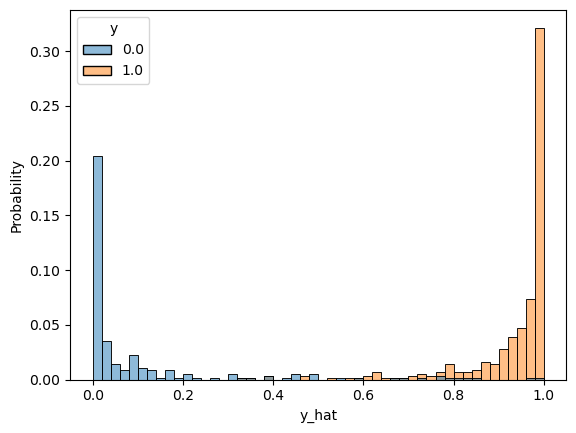

In [42]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=['y', 'y_hat'])
sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()